In [1]:
import os
import sys
import urllib, io

import numpy as np
import scipy.stats as stats
import pandas as pd

import pymongo as pm
from collections import Counter
import json
import re
import ast

from PIL import Image, ImageOps, ImageDraw, ImageFont 

from io import BytesIO
import base64

import  matplotlib
from matplotlib import pylab, mlab, pyplot
%matplotlib inline
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')

from IPython.display import clear_output

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

### setup paths

In [2]:
## directory & file hierarchy
proj_dir = os.path.abspath('..')
datavol_dir = os.path.join(proj_dir,'data')
analysis_dir = os.getcwd()
results_dir = os.path.join(proj_dir,'results')
plot_dir = os.path.join(results_dir,'plots')
csv_dir = os.path.join(results_dir,'csv')
json_dir = os.path.join(results_dir,'json')
exp_dir = os.path.abspath(os.path.join(proj_dir,'experiments'))
png_dir = os.path.abspath(os.path.join(datavol_dir,'png'))

## add helpers to python path
if os.path.join(proj_dir,'analysis') not in sys.path:
    sys.path.append(os.path.join(proj_dir,'python'))
    
if not os.path.exists(results_dir):
    os.makedirs(results_dir)
    
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)   
    
if not os.path.exists(csv_dir):
    os.makedirs(csv_dir)       
    
## Assign variables within imported analysis helpers
import analysis_helpers as h
if sys.version_info[0]>=3:
    from importlib import reload
reload(h)

<module 'analysis_helpers' from '/Users/will/GitHub/block_construction/analysis/analysis_helpers.py'>

### connect to db [skip this if on compute server that is behind vpn]

#### remember to establish tunnel to cogtoolslab server first: `ssh -fNL 27017:127.0.0.1:27017 USER@cogtoolslab.org`

In [5]:
## set vars 
auth = pd.read_csv('auth.txt', header = None) # this auth.txt file contains the password for the sketchloop user
pswd = auth.values[0][0]
user = 'sketchloop'
host = 'cogtoolslab.org' ## cocolab ip address

## have to fix this to be able to analyze from local
import pymongo as pm
conn = pm.MongoClient('mongodb://sketchloop:' + pswd + '@127.0.0.1')
db = conn['block_construction']
coll = db['silhouette']

## which iteration name should we use?
iterationName = 'dataTesting'

In [ ]:
coll.distinct('iterationName')

### query over mongodb records and organize into tidy dataframe

In [ ]:
## define how we will initially query records in the database
query = coll.find({'blockVertices':{'$exists':True},'iterationName':iterationName })

In [ ]:
## convert into pandas dataframe
df = pd.DataFrame(list(query.sort('time_absolute')))

In [ ]:
query = coll.find({'randID':'v31lrjcfgdbtbrqb5utri'})
df = pd.DataFrame(list(query.sort('time_absolute')))
df

### Show some reduced dataframes

Check if all data events are recorded

In [6]:
# get whole sequence of data for one person
query = coll.find({'randID':'v31lrjcfgdbtbrqb5utri'})
df = pd.DataFrame(list(query.sort('time_absolute')))
df[['normedIncrementalScore','trialNum','condition','phase','eventType','score']]

,normedIncrementalScore,trialNum,condition,phase,eventType,score
0,NaN,0,mental,explore,explore_end,0.00
1,NaN,0,mental,build,initial,0.00
2,0.393964,0,mental,build,settled,0.00
3,NaN,0,mental,build,initial,0.00
4,0.548540,0,mental,build,settled,0.00
5,NaN,0,mental,build,initial,0.00
6,0.594385,0,mental,build,settled,0.00
7,NaN,0,mental,build,initial,0.00
8,0.631717,0,mental,build,settled,0.00
9,NaN,0,mental,build,initial,0.00


In [7]:
# get whole sequence of data for one person
query = coll.find({"$and":[
                        {'randID':"v31lrjcfgdbtbrqb5utri"},
                        {'eventType':{"$ne":'settled'}},
                        {'eventType':{"$ne":'initial'}}]
                     })
df = pd.DataFrame(list(query.sort('time_absolute')))
df[['trialNum','phase','condition','eventType','score','normedScore']]

,trialNum,phase,condition,eventType,score,normedScore
0,0,explore,mental,explore_end,0.00,0.000000
1,0,build,mental,trial_end,0.05,0.962209
2,1,explore,mental,explore_end,0.00,0.000000
3,1,build,mental,trial_end,0.10,0.930488
4,2,explore,physical,explore_end,0.00,0.000000
5,2,build,physical,trial_end,0.15,0.970804
6,3,explore,physical,explore_end,0.00,0.000000
7,3,build,physical,reset,0.00,0.000000
8,3,build,physical,trial_end,0.20,0.936793
9,4,explore,mental,explore_end,0.00,0.000000


### Basic analyses: accuracy and nblocks

In [8]:
# get sequence of trial_end data for all people
# note that these currently lump everyone together, and don't
query = coll.find({"$and":[
                        {'condition':{'$ne':'practice'}},
                        {'eventType':'trial_end'}]
                     })
df_full = pd.DataFrame(list(query.sort('time_absolute')))
df = df_full[['randID','trialNum','phase','condition','eventType','score','normedScore','numBlocks']]
df

,randID,trialNum,phase,condition,eventType,score,normedScore,numBlocks
0,la1a7eu2klgwy8oc6ha64,0,build,mental,trial_end,0.00,0.000000,0
1,la1a7eu2klgwy8oc6ha64,1,build,mental,trial_end,0.00,0.645422,4
2,la1a7eu2klgwy8oc6ha64,2,build,physical,trial_end,0.03,0.918981,8
3,9uvh0d5wtv5m22442kmpm,0,build,physical,trial_end,0.00,0.000000,0
4,v31lrjcfgdbtbrqb5utri,0,build,mental,trial_end,0.05,0.962209,12
5,v31lrjcfgdbtbrqb5utri,1,build,mental,trial_end,0.10,0.930488,11
6,v31lrjcfgdbtbrqb5utri,2,build,physical,trial_end,0.15,0.970804,9
7,v31lrjcfgdbtbrqb5utri,3,build,physical,trial_end,0.20,0.936793,11
8,v31lrjcfgdbtbrqb5utri,4,build,mental,trial_end,0.25,0.974775,12
9,v31lrjcfgdbtbrqb5utri,5,build,physical,trial_end,0.25,0.000000,0


In [9]:
# Overall accuracy and nblocks
df[['condition','normedScore','numBlocks']].describe()

,normedScore,numBlocks
count,12.000000,12.000000
mean,0.681983,7.416667
std,0.420288,4.999242
min,0.000000,0.000000
25%,0.484067,3.000000
50%,0.924735,9.500000
75%,0.944353,11.250000
max,0.974775,12.000000


In [10]:
# By condition, accuracy and nblocks
df[['condition','normedScore','numBlocks']].groupby(by='condition').describe()

normedScore                                                         \
                count      mean       std  min       25%       50%       75%   
condition                                                                      
mental            6.0  0.741883  0.383841  0.0  0.716689  0.934445  0.956257   
physical          6.0  0.622084  0.482357  0.0  0.226482  0.912455  0.932340   

                    numBlocks                                                   
                max     count      mean       std  min  25%   50%    75%   max  
condition                                                                       
mental     0.974775       6.0  8.166667  4.996666  0.0  5.5  10.5  11.75  12.0  
physical   0.970804       6.0  6.666667  5.354126  0.0  2.0   8.5  10.50  12.0

# Useful queries






In [ ]:
# get whole sequence of data for one person
query = coll.find({'gameID':'7970-01a11233-665c-40d2-b7a3-3dabeb8f2a35'})
df = pd.DataFrame(list(query.sort('time_absolute')))
df[['normedIncrementalScore','trialNum','phase','eventType','score']]


In [ ]:
## get successful practice trials
query = coll.find({'randID':"tjj25al28dtwvg86troo6i", 'eventType':'practice_attempt', 'success':True})
df = pd.DataFrame(list(query.sort('time_absolute')))


In [ ]:
## Get list of block placements from any person
query = coll.find({'blockVertices':{'$exists':True},'trialList':{'$exists':True},'iterationName':'dataTesting' })
df = pd.DataFrame(list(query.sort('phase')))


In [ ]:
# Get survey data from someone
query = coll.find({'eventType':"survey_data", 'randID' :'eab9cf17pm7qdfnfocxwk'})
df = pd.DataFrame(list(query.sort('time_absolute')))

In [ ]:
## get vertices of blocks at each settled-block event
query = coll.find({'eventType':'settled', 'randID':"5310wg9k0d06l9jn2tlui8"})
df = pd.DataFrame(list(query.sort('time_absolute')))
listOfVertices = df['allVertices'] # list of vertices is a list of whole worlds of blocks
vertices = listOfVertices[13] # vertices is one world, which contains multiple blocks

In [ ]:
# Expression for converting vertices dict to vertices list 
list(map(lambda block: list(map(lambda corner: (corner['x'],world_size-corner['y']), block)), vertices))

# Draw world from vertices

In [11]:
import numpy as np
from PIL import Image

from matplotlib import pylab, mlab, pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.path import Path
import matplotlib.patches as patches
import copy
import json
import datetime
import random
from random import randint
import string
import os

world_size = 900;

def patch_for_block(b):
    return get_patch(b,color='#29335C')

def patches_for_world(blocks):
    patches = []
    for (b) in blocks:
        patches.append(patch_for_block(b))
    return patches

def draw_world(vertices):
    fig = render_blockworld(patches_for_world(vertices)) 
    return fig

def get_patch(verts,
              color='orange',
              line_width = 0.2):
    '''
    input:
        verts: array or list of (x,y) vertices of convex polygon. 
                last vertex = first vertex, so len(verts) is num_vertices + 1
        color: facecolor
        line_width: edge width    
    output:
        patch matplotlib.path patch object
    '''
    codes = [1] + [2]*(len(verts)-1)    ## 1 = MOVETO, 2 = LINETO
    path = Path(verts,codes)
    patch = patches.PathPatch(path, facecolor=color, lw=line_width)
    return patch

def render_blockworld(patches,
                      xlim=(0,world_size),
                      ylim=(0,world_size),
                      figsize=(4,4)):
    
    '''
    input: 
        patches: list of patches generated by get_patch() function
        xlim, ylim: axis limits
        figsize: defaults to square aspect ratio
    output:
        visualization of block placement
    '''
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    for patch in patches:
        ax.add_patch(patch)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)        
    plt.show()
    return fig


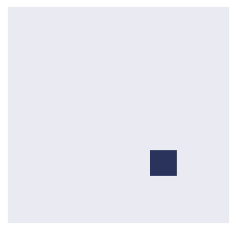

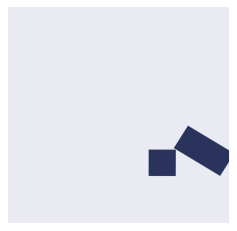

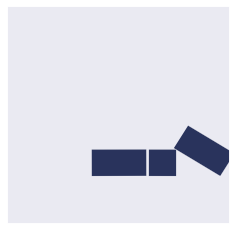

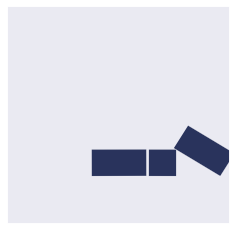

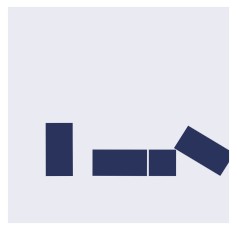

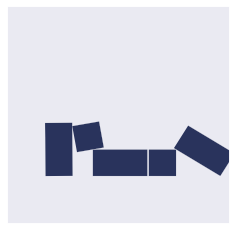

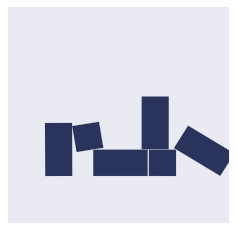

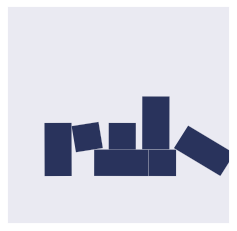

In [13]:
## get end state of trials
query = coll.find({'eventType':'settled', 'randID':"5310wg9k0d06l9jn2tlui8"})
df = pd.DataFrame(list(query.sort('time_absolute')))
for i in range(6,14):
    vertices = df['allVertices'][i]
    collapsed_verts = list(map(lambda block: list(map(lambda corner: (corner['x'],world_size-corner['y']), block)), vertices))
    draw_world(collapsed_verts)